# Here we will explore the role of size (as a proxy for age) on microbiome structure. We will then explore the latitudinal diversity hypothesis.

In [1]:
setwd('..')
getwd()
library(ggplot2)

[1] "/Users/FJPollock/Dropbox/coral_microbiomes_postdoc/GCMP_OSU_PSU_Shared_Folder/Coral_microbe_coevolution/Projects/Australia_Coevolution_Paper/16S_analysis/7_microbiomes_w_coral_size"

In [2]:
#Import the data
read.csv('output/microbiome_age_v1.csv', header=T)->data
head(data)


,X.SampleID,PD_whole_tree,observed_otus,Chao1,X.SampleID.1,BarcodeSequence,runID,sequence_center_ID,sequence_center_ID_base,collection_id,ellip.h,collected_by,relevant_collaborators,visibility,visibility_method,env_biome,env_feature,prop_Colony_maximum_GCMP_recorded,prop_Colony_maximum_diameter_universal,prop_Colony_maximum_diameter,Description
1,E1.10.Poc.dami.1.20140728.M,6.92672,41,95.16667,E1.10.Poc.dami.1.20140728.M,CTCAAGAAGC,ALVCP,Pollock680_Poci_Muc_140728,Pollock680,Big Vickie_20140728,⋯,Ryan McMinds,"David Bourne, Katia Nicolet, and many others at JCU, AIMS, and LIRS",12,Horizontal Secchi Disk,coral reef,animal-associated habitat,0.454545455,0.125,0.125,"Coral Mucus from Pocillopora damicornis sampled from Lizard Island, Australia as sample E1.10.Poc.dami.1.20140728.M of the Global Coral Microbiome Project"
2,E1.10.Poc.dami.1.20140728.S,11.11539,64,95.5,E1.10.Poc.dami.1.20140728.S,GGAACACAGG,ALVCP,Pollock682_Poci_Ske_140728,Pollock682,Big Vickie_20140728,⋯,Ryan McMinds,"David Bourne, Katia Nicolet, and many others at JCU, AIMS, and LIRS",12,Horizontal Secchi Disk,coral reef,animal-associated habitat,0.454545455,0.125,0.125,"Coral Skeleton from Pocillopora damicornis sampled from Lizard Island, Australia as sample E1.10.Poc.dami.1.20140728.S of the Global Coral Microbiome Project"
3,E1.10.Poc.dami.1.20140728.T,10.52376,37,64.14286,E1.10.Poc.dami.1.20140728.T,TGGTTCGCTG,ALVCP,Pollock681_Poci_Tis_140728,Pollock681,Big Vickie_20140728,⋯,Ryan McMinds,"David Bourne, Katia Nicolet, and many others at JCU, AIMS, and LIRS",12,Horizontal Secchi Disk,coral reef,animal-associated habitat,0.454545455,0.125,0.125,"Coral Tissue from Pocillopora damicornis sampled from Lizard Island, Australia as sample E1.10.Poc.dami.1.20140728.T of the Global Coral Microbiome Project"
4,E1.10.Poc.dami.1.20140731.M,6.67193,25,52.5,E1.10.Poc.dami.1.20140731.M,GCACTGTTGC,ALVCP,Pollock337,Pollock337,Horseshoe_20140731,⋯,Ryan McMinds,"David Bourne, Katia Nicolet, and many others at JCU, AIMS, and LIRS",15,Horizontal Secchi Disk,coral reef,animal-associated habitat,0.309090909,0.085,0.085,"Coral Mucus from Pocillopora damicornis sampled from Lizard Island, Australia as sample E1.10.Poc.dami.1.20140731.M of the Global Coral Microbiome Project"
5,E1.10.Poc.dami.1.20140731.S,44.09446,328,1021.026,E1.10.Poc.dami.1.20140731.S,AGGTAAGAGG,ALVCP,Pollock339,Pollock339,Horseshoe_20140731,⋯,Ryan McMinds,"David Bourne, Katia Nicolet, and many others at JCU, AIMS, and LIRS",15,Horizontal Secchi Disk,coral reef,animal-associated habitat,0.309090909,0.085,0.085,"Coral Skeleton from Pocillopora damicornis sampled from Lizard Island, Australia as sample E1.10.Poc.dami.1.20140731.S of the Global Coral Microbiome Project"
6,E1.10.Poc.dami.1.20140731.T,36.402,199,702.75,E1.10.Poc.dami.1.20140731.T,TCCTGACAGA,ALVCP,Pollock338,Pollock338,Horseshoe_20140731,⋯,Ryan McMinds,"David Bourne, Katia Nicolet, and many others at JCU, AIMS, and LIRS",15,Horizontal Secchi Disk,coral reef,animal-associated habitat,0.309090909,0.085,0.085,"Coral Tissue from Pocillopora damicornis sampled from Lizard Island, Australia as sample E1.10.Poc.dami.1.20140731.T of the Global Coral Microbiome Project"


In [4]:
#remove Unknown size
subset(data,colony_width_max != "Unknown")->data_no_unknown

#remove Unknown functional group
subset(data_no_unknown,functional_group_sensu_darling != "Unknown")->data_no_unknown

In [5]:
is.numeric(as.numeric(as.character(data_no_unknown$prop_Colony_maximum_diameter_universal)))

[1] TRUE

# Is coral size correlated with microbiome diversity?

Warning message:
: Removed 30 rows containing non-finite values (stat_smooth).Warning message:
: Removed 30 rows containing missing values (geom_point).

[1] "Pearson's Product Moment Correlation"



	Pearson's product-moment correlation

data:  as.numeric(as.character(data_no_unknown$prop_Colony_maximum_diameter_universal)) and as.numeric(as.character(data_no_unknown$PD_whole_tree))
t = -1.8443, df = 275, p-value = 0.06621
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.225453867  0.007416705
sample estimates:
       cor 
-0.1105354 


ERROR: Error in file(con, "rb"): cannot open the connection


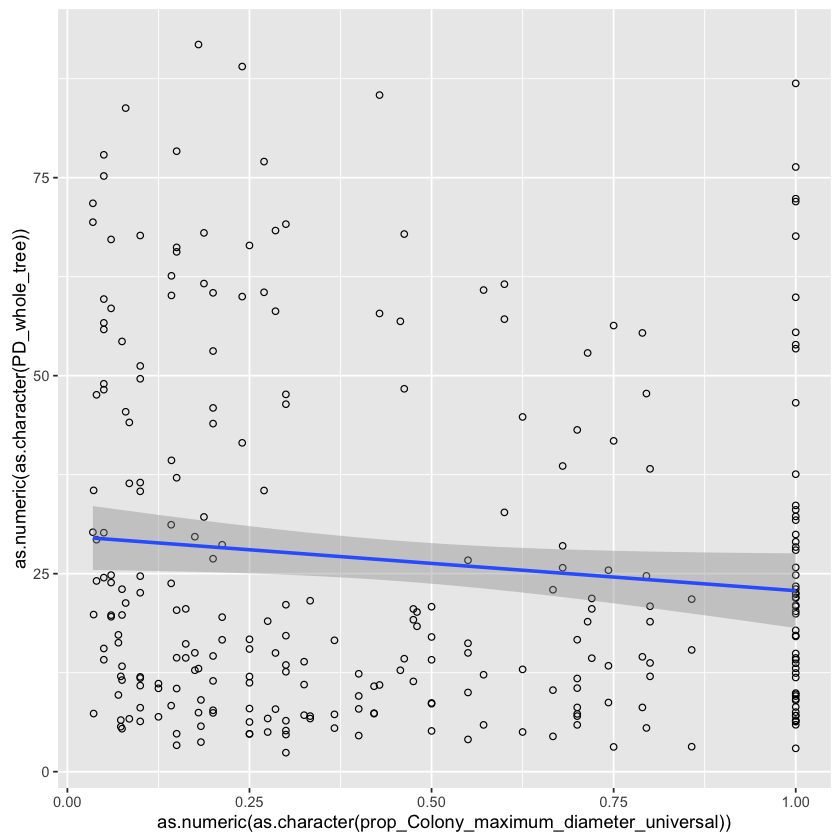

In [43]:
#PD_whole_tree~prop_Colony_maximum_diameter_universal
library(ggplot2)
ggplot(data_no_unknown, aes(x=as.numeric(as.character(prop_Colony_maximum_diameter_universal)), y=as.numeric(as.character(PD_whole_tree)))) +
    geom_point(shape=1) +
    geom_smooth(method=lm,   # Add linear regression lines
                se=TRUE)    # Add shaded confidence region

print("Pearson's Product Moment Correlation")
cor.test(as.numeric(as.character(data_no_unknown$prop_Colony_maximum_diameter_universal)), as.numeric(as.character(data_no_unknown$PD_whole_tree)),
         alternative = "two.sided", method = "pearson", conf.level = 0.95)

# Overall, there seems to be no correlation between size and bacterial diversity
# Let's break it down by functional group

[1] "Competitive"



	Pearson's product-moment correlation

data:  as.numeric(as.character(data_no_unknown_competitive$prop_Colony_maximum_diameter_universal)) and as.numeric(as.character(data_no_unknown_competitive$PD_whole_tree))
t = -0.016283, df = 24, p-value = 0.9871
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.3901734  0.3845232
sample estimates:
         cor 
-0.003323779 


[1] "Generalist"



	Pearson's product-moment correlation

data:  as.numeric(as.character(data_no_unknown_generalist$prop_Colony_maximum_diameter_universal)) and as.numeric(as.character(data_no_unknown_generalist$PD_whole_tree))
t = 0.26667, df = 33, p-value = 0.7914
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.2913783  0.3738405
sample estimates:
       cor 
0.04637085 


[1] "Stress-tolerant"



	Pearson's product-moment correlation

data:  as.numeric(as.character(data_no_unknown_stress_tolerant$prop_Colony_maximum_diameter_universal)) and as.numeric(as.character(data_no_unknown_stress_tolerant$PD_whole_tree))
t = -2.5102, df = 165, p-value = 0.01303
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.33392543 -0.04112169
sample estimates:
       cor 
-0.1917876 


[1] "Weedy"



	Pearson's product-moment correlation

data:  as.numeric(as.character(data_no_unknown_weedy$prop_Colony_maximum_diameter_universal)) and as.numeric(as.character(data_no_unknown_weedy$PD_whole_tree))
t = -1.4166, df = 47, p-value = 0.1632
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.45751946  0.08359677
sample estimates:
       cor 
-0.2023566 


Warning message:
: Removed 30 rows containing non-finite values (stat_smooth).Warning message:
: Removed 30 rows containing missing values (geom_point).

ERROR: Error in file(con, "rb"): cannot open the connection


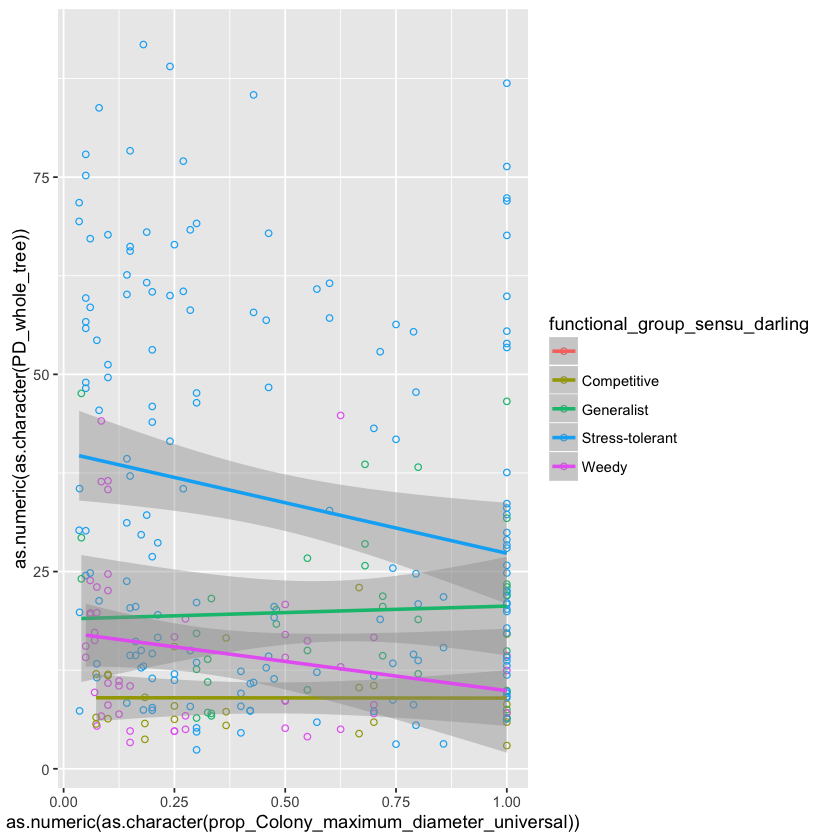

In [45]:
subset(data_no_unknown, functional_group_sensu_darling == "Competitive")->data_no_unknown_competitive
subset(data_no_unknown, functional_group_sensu_darling == "Generalist")->data_no_unknown_generalist
subset(data_no_unknown, functional_group_sensu_darling == "Stress-tolerant")->data_no_unknown_stress_tolerant
subset(data_no_unknown, functional_group_sensu_darling == "Weedy")->data_no_unknown_weedy

print("Competitive")
cor.test(as.numeric(as.character(data_no_unknown_competitive$prop_Colony_maximum_diameter_universal)), as.numeric(as.character(data_no_unknown_competitive$PD_whole_tree)),
         alternative = "two.sided", method = "pearson", conf.level = 0.95)
print("Generalist")
cor.test(as.numeric(as.character(data_no_unknown_generalist$prop_Colony_maximum_diameter_universal)), as.numeric(as.character(data_no_unknown_generalist$PD_whole_tree)),
         alternative = "two.sided", method = "pearson", conf.level = 0.95)
print("Stress-tolerant")
cor.test(as.numeric(as.character(data_no_unknown_stress_tolerant$prop_Colony_maximum_diameter_universal)), as.numeric(as.character(data_no_unknown_stress_tolerant$PD_whole_tree)),
         alternative = "two.sided", method = "pearson", conf.level = 0.95)
print("Weedy")
cor.test(as.numeric(as.character(data_no_unknown_weedy$prop_Colony_maximum_diameter_universal)), as.numeric(as.character(data_no_unknown_weedy$PD_whole_tree)),
         alternative = "two.sided", method = "pearson", conf.level = 0.95)

ggplot(data_no_unknown, aes(x=as.numeric(as.character(prop_Colony_maximum_diameter_universal)), y=as.numeric(as.character(PD_whole_tree)), color = functional_group_sensu_darling)) +
    geom_point(shape=1) +
    geom_smooth(method=lm,   # Add linear regression lines
                se=TRUE)    # Add shaded confidence region

# Most pronounced for stress-tolerant. Does this hold for all compartments w/in stress-tolerant?

[1] "Tissue"



	Pearson's product-moment correlation

data:  as.numeric(as.character(data_no_unknown_stress_tolerant_tissue$prop_Colony_maximum_diameter_universal)) and as.numeric(as.character(data_no_unknown_stress_tolerant_tissue$PD_whole_tree))
t = -2.4923, df = 50, p-value = 0.01605
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.55497158 -0.06545377
sample estimates:
       cor 
-0.3324164 


[1] "Mucus"



	Pearson's product-moment correlation

data:  as.numeric(as.character(data_no_unknown_stress_tolerant_mucus$prop_Colony_maximum_diameter_universal)) and as.numeric(as.character(data_no_unknown_stress_tolerant_mucus$PD_whole_tree))
t = -1.0824, df = 55, p-value = 0.2838
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.3902997  0.1206899
sample estimates:
       cor 
-0.1444194 


[1] "Skeleton"



	Pearson's product-moment correlation

data:  as.numeric(as.character(data_no_unknown_stress_tolerant_skeleton$prop_Colony_maximum_diameter_universal)) and as.numeric(as.character(data_no_unknown_stress_tolerant_skeleton$PD_whole_tree))
t = -1.0595, df = 56, p-value = 0.2939
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.3845551  0.1225496
sample estimates:
       cor 
-0.1401836 


ERROR: Error in file(con, "rb"): cannot open the connection


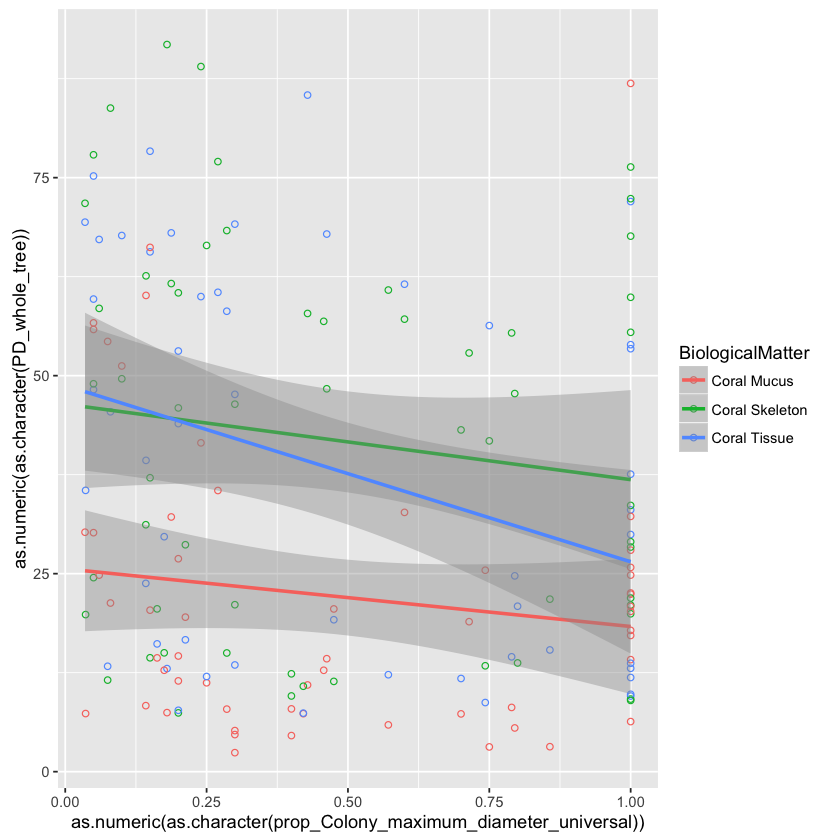

In [50]:
subset(data_no_unknown_stress_tolerant, BiologicalMatter == "Coral Tissue")->data_no_unknown_stress_tolerant_tissue
subset(data_no_unknown_stress_tolerant, BiologicalMatter == "Coral Mucus")->data_no_unknown_stress_tolerant_mucus
subset(data_no_unknown_stress_tolerant, BiologicalMatter == "Coral Skeleton")->data_no_unknown_stress_tolerant_skeleton

print("Tissue")
cor.test(as.numeric(as.character(data_no_unknown_stress_tolerant_tissue$prop_Colony_maximum_diameter_universal)), as.numeric(as.character(data_no_unknown_stress_tolerant_tissue$PD_whole_tree)),
         alternative = "two.sided", method = "pearson", conf.level = 0.95)
print("Mucus")
cor.test(as.numeric(as.character(data_no_unknown_stress_tolerant_mucus$prop_Colony_maximum_diameter_universal)), as.numeric(as.character(data_no_unknown_stress_tolerant_mucus$PD_whole_tree)),
         alternative = "two.sided", method = "pearson", conf.level = 0.95)
print("Skeleton")
cor.test(as.numeric(as.character(data_no_unknown_stress_tolerant_skeleton$prop_Colony_maximum_diameter_universal)), as.numeric(as.character(data_no_unknown_stress_tolerant_skeleton$PD_whole_tree)),
         alternative = "two.sided", method = "pearson", conf.level = 0.95)

library(ggplot2)
ggplot(data_no_unknown_stress_tolerant, aes(x=as.numeric(as.character(prop_Colony_maximum_diameter_universal)), y=as.numeric(as.character(PD_whole_tree)), color=BiologicalMatter)) +
    geom_point(shape=1) +
    geom_smooth(method=lm,   # Add linear regression lines
                se=TRUE)    # Add shaded confidence region

# Correlation between size and diversity seems to be largely driven by reductions in microbial diversity within tissues of larger (presumably older) corals.

# If we only look at tissue, do we see this in other groups?


# Within Tissue, do we see correlations between richness and size in different functional groups?

[1] "Tissue: Competitive"



	Pearson's product-moment correlation

data:  as.numeric(as.character(data_no_unknown_tissue_competitive$prop_Colony_maximum_diameter_universal)) and as.numeric(as.character(data_no_unknown_tissue_competitive$PD_whole_tree))
t = -1.7687, df = 6, p-value = 0.1273
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.9133195  0.2030024
sample estimates:
       cor 
-0.5854142 


[1] "Tissue: Generalist"



	Pearson's product-moment correlation

data:  as.numeric(as.character(data_no_unknown_tissue_generalist$prop_Colony_maximum_diameter_universal)) and as.numeric(as.character(data_no_unknown_tissue_generalist$PD_whole_tree))
t = -1.1728, df = 10, p-value = 0.2681
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.7683006  0.2825727
sample estimates:
      cor 
-0.347718 


[1] "Tissue: Stress-tolerant"



	Pearson's product-moment correlation

data:  as.numeric(as.character(data_no_unknown_tissue_stress_tolerant$prop_Colony_maximum_diameter_universal)) and as.numeric(as.character(data_no_unknown_tissue_stress_tolerant$PD_whole_tree))
t = -2.4923, df = 50, p-value = 0.01605
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.55497158 -0.06545377
sample estimates:
       cor 
-0.3324164 


[1] "Tissue: Weedy"



	Pearson's product-moment correlation

data:  as.numeric(as.character(data_no_unknown_tissue_weedy$prop_Colony_maximum_diameter_universal)) and as.numeric(as.character(data_no_unknown_tissue_weedy$PD_whole_tree))
t = -1.7762, df = 15, p-value = 0.09599
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.74769332  0.07977157
sample estimates:
       cor 
-0.4168562 


ERROR: Error in file(con, "rb"): cannot open the connection


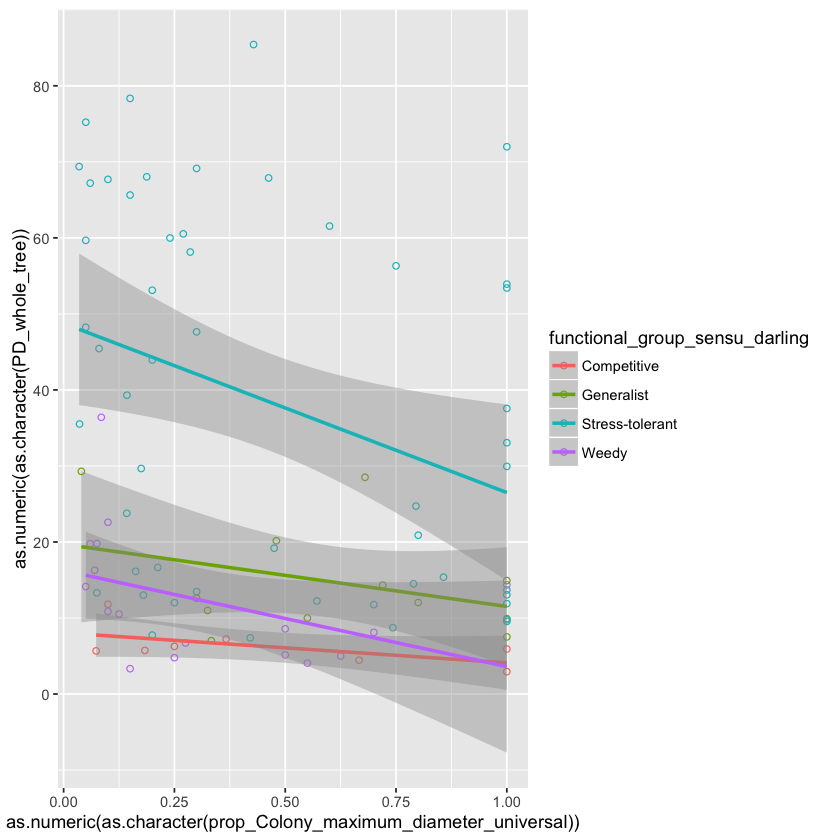

In [51]:
subset(data_no_unknown, BiologicalMatter == "Coral Tissue")->data_no_unknown_tissue
subset(data_no_unknown_tissue, functional_group_sensu_darling == "Competitive")->data_no_unknown_tissue_competitive
subset(data_no_unknown_tissue, functional_group_sensu_darling == "Generalist")->data_no_unknown_tissue_generalist
subset(data_no_unknown_tissue, functional_group_sensu_darling == "Stress-tolerant")->data_no_unknown_tissue_stress_tolerant
subset(data_no_unknown_tissue, functional_group_sensu_darling == "Weedy")->data_no_unknown_tissue_weedy

print("Tissue: Competitive")
cor.test(as.numeric(as.character(data_no_unknown_tissue_competitive$prop_Colony_maximum_diameter_universal)), as.numeric(as.character(data_no_unknown_tissue_competitive$PD_whole_tree)),
         alternative = "two.sided", method = "pearson", conf.level = 0.95)
print("Tissue: Generalist")
cor.test(as.numeric(as.character(data_no_unknown_tissue_generalist$prop_Colony_maximum_diameter_universal)), as.numeric(as.character(data_no_unknown_tissue_generalist$PD_whole_tree)),
         alternative = "two.sided", method = "pearson", conf.level = 0.95)
print("Tissue: Stress-tolerant")
cor.test(as.numeric(as.character(data_no_unknown_tissue_stress_tolerant$prop_Colony_maximum_diameter_universal)), as.numeric(as.character(data_no_unknown_tissue_stress_tolerant$PD_whole_tree)),
         alternative = "two.sided", method = "pearson", conf.level = 0.95)
print("Tissue: Weedy")
cor.test(as.numeric(as.character(data_no_unknown_tissue_weedy$prop_Colony_maximum_diameter_universal)), as.numeric(as.character(data_no_unknown_tissue_weedy$PD_whole_tree)),
         alternative = "two.sided", method = "pearson", conf.level = 0.95)

ggplot(data_no_unknown_tissue, aes(x=as.numeric(as.character(prop_Colony_maximum_diameter_universal)), y=as.numeric(as.character(PD_whole_tree)), color = functional_group_sensu_darling)) +
    geom_point(shape=1) +
    geom_smooth(method=lm,   # Add linear regression lines
                se=TRUE)    # Add shaded confidence region

# Within tissue, all functional groups seem to have a negative trend with size, but only significant for Stress-Tolerant

# For all Functional Groups, does correlation between size and diversity hold for all tissues combined?

[1] "Tissue"



	Pearson's product-moment correlation

data:  as.numeric(as.character(data_no_unknown_tissue$prop_Colony_maximum_diameter_universal)) and as.numeric(as.character(data_no_unknown_tissue$PD_whole_tree))
t = -2.1243, df = 87, p-value = 0.03648
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.41129877 -0.01447572
sample estimates:
      cor 
-0.222063 


[1] "Mucus"



	Pearson's product-moment correlation

data:  as.numeric(as.character(data_no_unknown_mucus$prop_Colony_maximum_diameter_universal)) and as.numeric(as.character(data_no_unknown_mucus$PD_whole_tree))
t = -0.09171, df = 91, p-value = 0.9271
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.2129047  0.1944758
sample estimates:
         cor 
-0.009613336 


[1] "Skeleton"



	Pearson's product-moment correlation

data:  as.numeric(as.character(data_no_unknown_skeleton$prop_Colony_maximum_diameter_universal)) and as.numeric(as.character(data_no_unknown_skeleton$PD_whole_tree))
t = -0.81038, df = 93, p-value = 0.4198
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.2805454  0.1198283
sample estimates:
      cor 
-0.083737 


Warning message:
: Removed 30 rows containing non-finite values (stat_smooth).Warning message:
: Removed 30 rows containing missing values (geom_point).

ERROR: Error in file(con, "rb"): cannot open the connection


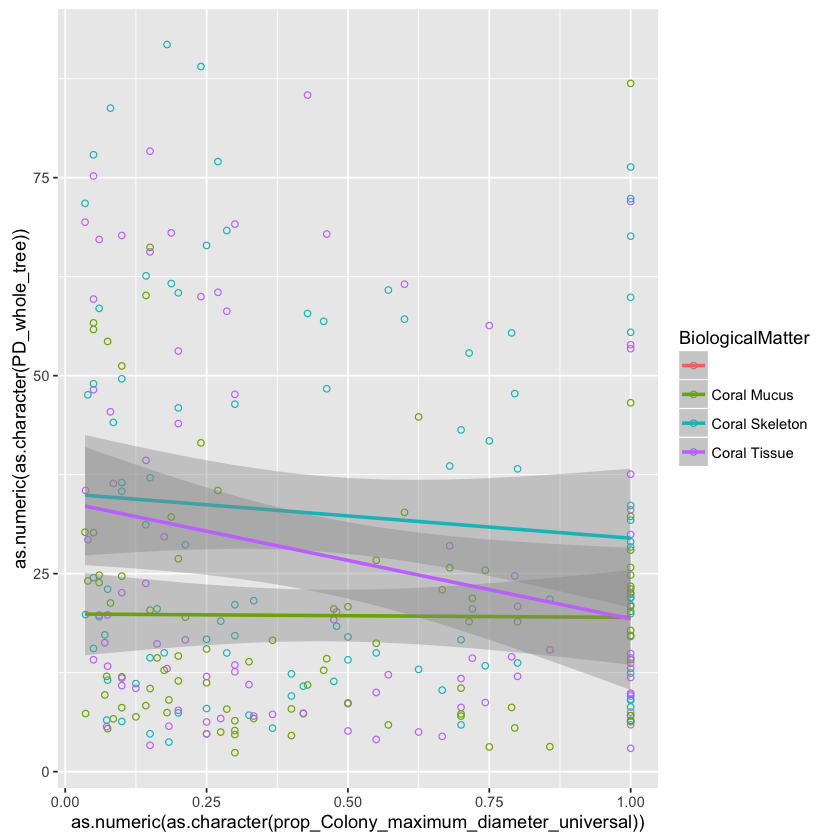

In [53]:
subset(data_no_unknown, BiologicalMatter == "Coral Tissue")->data_no_unknown_tissue
subset(data_no_unknown, BiologicalMatter == "Coral Mucus")->data_no_unknown_mucus
subset(data_no_unknown, BiologicalMatter == "Coral Skeleton")->data_no_unknown_skeleton

print("Tissue")
cor.test(as.numeric(as.character(data_no_unknown_tissue$prop_Colony_maximum_diameter_universal)), as.numeric(as.character(data_no_unknown_tissue$PD_whole_tree)),
         alternative = "two.sided", method = "pearson", conf.level = 0.95)
print("Mucus")
cor.test(as.numeric(as.character(data_no_unknown_mucus$prop_Colony_maximum_diameter_universal)), as.numeric(as.character(data_no_unknown_mucus$PD_whole_tree)),
         alternative = "two.sided", method = "pearson", conf.level = 0.95)
print("Skeleton")
cor.test(as.numeric(as.character(data_no_unknown_skeleton$prop_Colony_maximum_diameter_universal)), as.numeric(as.character(data_no_unknown_skeleton$PD_whole_tree)),
         alternative = "two.sided", method = "pearson", conf.level = 0.95)

ggplot(data_no_unknown, aes(x=as.numeric(as.character(prop_Colony_maximum_diameter_universal)), y=as.numeric(as.character(PD_whole_tree)), color = BiologicalMatter)) +
    geom_point(shape=1) +
    geom_smooth(method=lm,   # Add linear regression lines
                se=TRUE)    # Add shaded confidence region

# As a whole, coral tissue microbial diversity is negatively correlated with size

[1] "Tissue"



	Pearson's product-moment correlation

data:  as.numeric(as.character(data_no_unknown_tissue$prop_Colony_maximum_diameter_universal)) and as.numeric(as.character(data_no_unknown_tissue$PD_whole_tree))
t = -2.1243, df = 87, p-value = 0.03648
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.41129877 -0.01447572
sample estimates:
      cor 
-0.222063 


ERROR: Error in file(con, "rb"): cannot open the connection


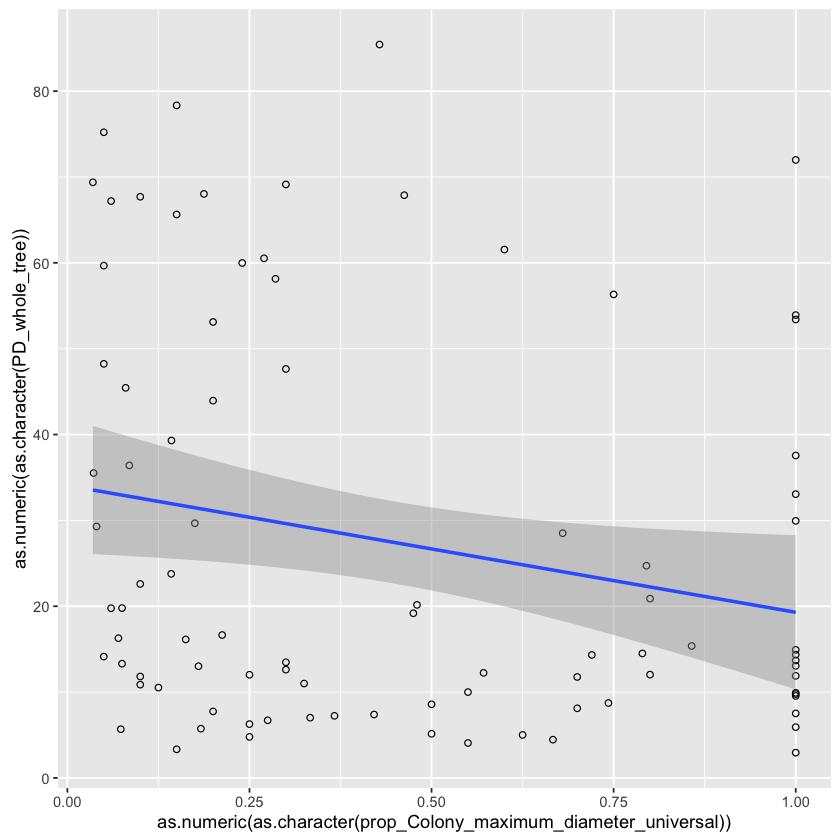

In [54]:
subset(data_no_unknown, BiologicalMatter == "Coral Tissue")->data_no_unknown_tissue


print("Tissue")
cor.test(as.numeric(as.character(data_no_unknown_tissue$prop_Colony_maximum_diameter_universal)), as.numeric(as.character(data_no_unknown_tissue$PD_whole_tree)),
         alternative = "two.sided", method = "pearson", conf.level = 0.95)

ggplot(data_no_unknown_tissue, aes(x=as.numeric(as.character(prop_Colony_maximum_diameter_universal)), y=as.numeric(as.character(PD_whole_tree)))) +
    geom_point(shape=1) +
    geom_smooth(method=lm,   # Add linear regression lines
                se=TRUE)    # Add shaded confidence region

# Is the correlation between coral size and microbial diversity in tissues driven by any particular taxa?

Warning message:
In qt((1 - level)/2, df): NaNs producedWarning message:
In qt((1 - level)/2, df): NaNs produced

ERROR: Error in file(con, "rb"): cannot open the connection


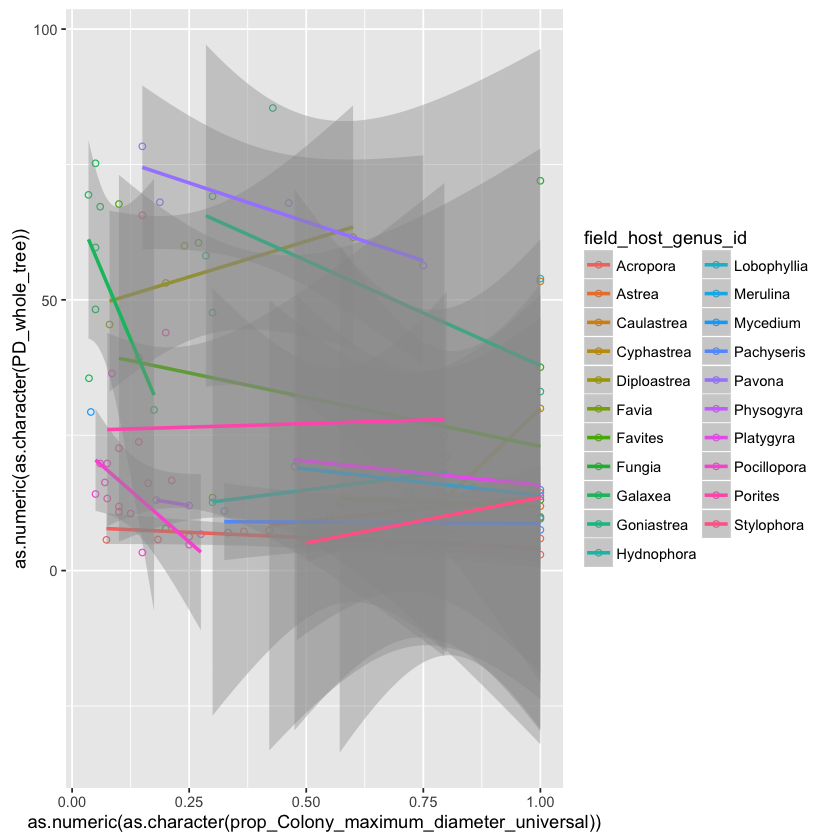

In [55]:
subset(data_no_unknown, BiologicalMatter == "Coral Tissue")->data_no_unknown_tissue

ggplot(data_no_unknown_tissue, aes(x=as.numeric(as.character(prop_Colony_maximum_diameter_universal)), y=as.numeric(as.character(PD_whole_tree)), color = field_host_genus_id)) +
    geom_point(shape=1) +
    geom_smooth(method=lm,   # Add linear regression lines
                se=TRUE)    # Add shaded confidence region

In [95]:
subset(data_no_unknown, BiologicalMatter == "Coral Tissue")->data_no_unknown_tissue

for (genus in unique(data_no_unknown_tissue$field_host_genus_id)){
    subset(data_no_unknown_tissue, field_host_genus_id == genus)->data_no_unknown_tissue_loop
    print(paste0("Genus: ", genus,", Replicates: ",nrow(data_no_unknown_tissue_loop)))
    if(nrow(data_no_unknown_tissue_loop)<4) next
    print(cor.test(as.numeric(as.character(data_no_unknown_tissue_loop$prop_Colony_maximum_diameter_universal)), as.numeric(as.character(data_no_unknown_tissue_loop$PD_whole_tree)),
         alternative = "two.sided", method = "pearson", conf.level = 0.95))
}

[1] "Genus: Pocillopora, Replicates: 9"

	Pearson's product-moment correlation

data:  as.numeric(as.character(data_no_unknown_tissue_loop$prop_Colony_maximum_diameter_universal)) and as.numeric(as.character(data_no_unknown_tissue_loop$PD_whole_tree))
t = -2.0838, df = 7, p-value = 0.07566
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.90923693  0.07704764
sample estimates:
       cor 
-0.6187341 

[1] "Genus: Stylophora, Replicates: 6"

	Pearson's product-moment correlation

data:  as.numeric(as.character(data_no_unknown_tissue_loop$prop_Colony_maximum_diameter_universal)) and as.numeric(as.character(data_no_unknown_tissue_loop$PD_whole_tree))
t = 3.0914, df = 4, p-value = 0.03653
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.08803008 0.98202442
sample estimates:
      cor 
0.8396082 

[1] "Genus: Fungia, Replicates: 2"
[1] "Genus: Physogyra, Replicates: 2"
[1] "Genus: Diploastrea, Replicat

# No obvious driver of this trend, sample sizes of individual genera are too low for much power.

# LATITUDINAL DIVERSITY HYPOTHESIS
# Let's explore the lat. diversity hypothesis

# Is there an overall reduction in diversity as we head poleward?

Warning message:
: Removed 30 rows containing non-finite values (stat_smooth).Warning message:
: Removed 30 rows containing missing values (geom_point).

ERROR: Error in file(con, "rb"): cannot open the connection


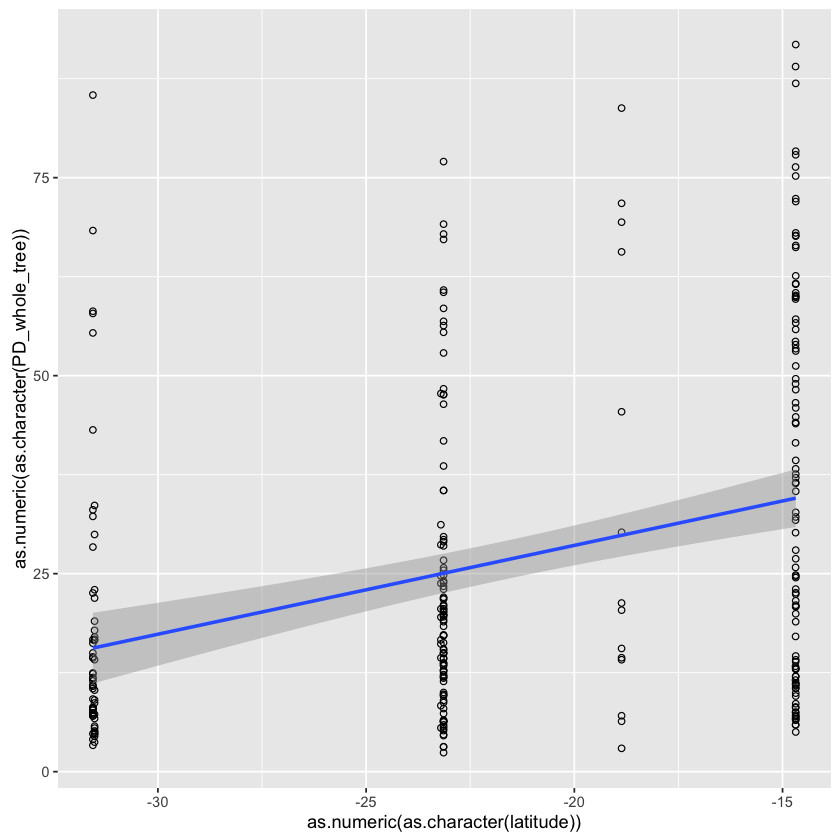

In [6]:
#PD_whole_tree~latitude
library(ggplot2)
ggplot(data_no_unknown, aes(x=as.numeric(as.character(latitude)), y=as.numeric(as.character(PD_whole_tree)))) +
    geom_point(shape=1) +
    geom_smooth(method=lm,   # Add linear regression lines
                se=TRUE)    # Add shaded confidence region

# Latitude and PD_whole_tree appear to be correlated, but let's test this...

In [15]:
cor.test(as.numeric(as.character(data_no_unknown$latitude)), as.numeric(as.character(data_no_unknown$PD_whole_tree)),
         alternative = "two.sided", method = "pearson", conf.level = 0.95)


	Pearson's product-moment correlation

data:  as.numeric(as.character(data_no_unknown$latitude)) and as.numeric(as.character(data_no_unknown$PD_whole_tree))
t = 5.7614, df = 275, p-value = 2.232e-08
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.2187882 0.4294275
sample estimates:
      cor 
0.3281814 


# Are these correlations maintained across all compartments?

Warning message:
: Removed 30 rows containing non-finite values (stat_smooth).Warning message:
: Removed 30 rows containing missing values (geom_point).

ERROR: Error in file(con, "rb"): cannot open the connection


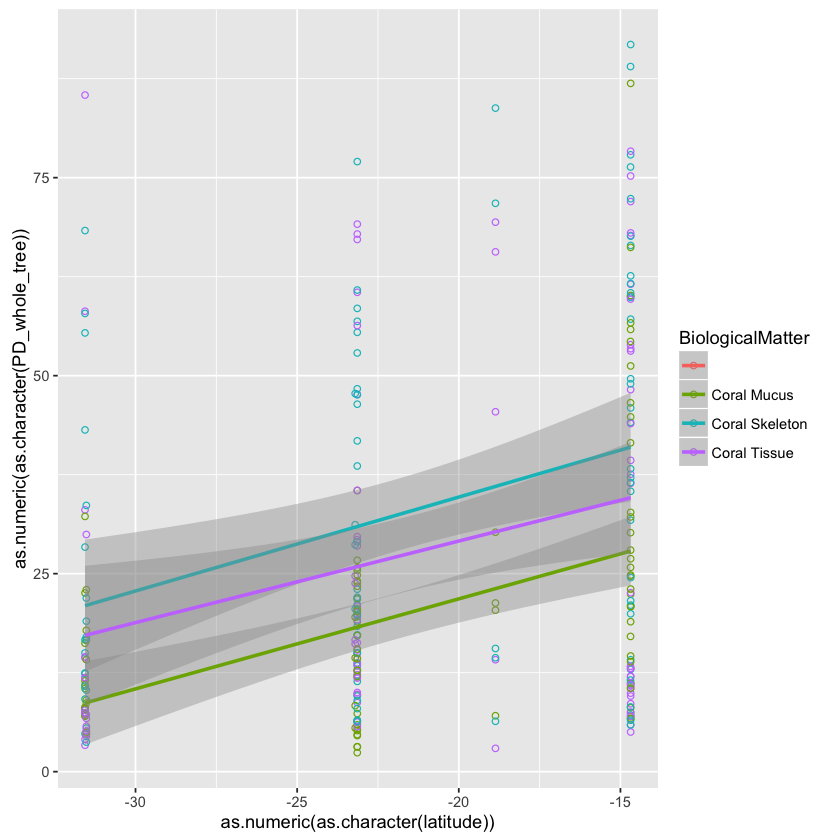

In [18]:
#PD_whole_tree~latitude, color=BiologicalMatter
library(ggplot2)
ggplot(data_no_unknown, aes(x=as.numeric(as.character(latitude)), y=as.numeric(as.character(PD_whole_tree)), color=BiologicalMatter))) +
    geom_point(shape=1) +
    geom_smooth(method=lm,   # Add linear regression lines
                se=TRUE)    # Add shaded confidence region

# Statistically confirm that correlation holds for all compartments

In [24]:
subset(data_no_unknown, BiologicalMatter == "Coral Tissue")->data_no_unknown_tissue
subset(data_no_unknown, BiologicalMatter == "Coral Mucus")->data_no_unknown_mucus
subset(data_no_unknown, BiologicalMatter == "Coral Skeleton")->data_no_unknown_skeleton

print("Tissue")
cor.test(as.numeric(as.character(data_no_unknown_tissue$latitude)), as.numeric(as.character(data_no_unknown_tissue$PD_whole_tree)),
         alternative = "two.sided", method = "pearson", conf.level = 0.95)
print("Mucus")
cor.test(as.numeric(as.character(data_no_unknown_mucus$latitude)), as.numeric(as.character(data_no_unknown_mucus$PD_whole_tree)),
         alternative = "two.sided", method = "pearson", conf.level = 0.95)
print("Skeleton")
cor.test(as.numeric(as.character(data_no_unknown_skeleton$latitude)), as.numeric(as.character(data_no_unknown_skeleton$PD_whole_tree)),
         alternative = "two.sided", method = "pearson", conf.level = 0.95)

[1] "Tissue"



	Pearson's product-moment correlation

data:  as.numeric(as.character(data_no_unknown_tissue$latitude)) and as.numeric(as.character(data_no_unknown_tissue$PD_whole_tree))
t = 2.7345, df = 87, p-value = 0.007569
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.07762073 0.46248976
sample estimates:
      cor 
0.2813298 


[1] "Mucus"



	Pearson's product-moment correlation

data:  as.numeric(as.character(data_no_unknown_mucus$latitude)) and as.numeric(as.character(data_no_unknown_mucus$PD_whole_tree))
t = 4.9784, df = 91, p-value = 3.023e-06
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.2859024 0.6089777
sample estimates:
      cor 
0.4626648 


[1] "Skeleton"



	Pearson's product-moment correlation

data:  as.numeric(as.character(data_no_unknown_skeleton$latitude)) and as.numeric(as.character(data_no_unknown_skeleton$PD_whole_tree))
t = 3.2695, df = 93, p-value = 0.001511
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.1278111 0.4908616
sample estimates:
      cor 
0.3210832 


Warning message:
: Removed 30 rows containing non-finite values (stat_smooth).Warning message:
: Removed 30 rows containing missing values (geom_point).

ERROR: Error in file(con, "rb"): cannot open the connection


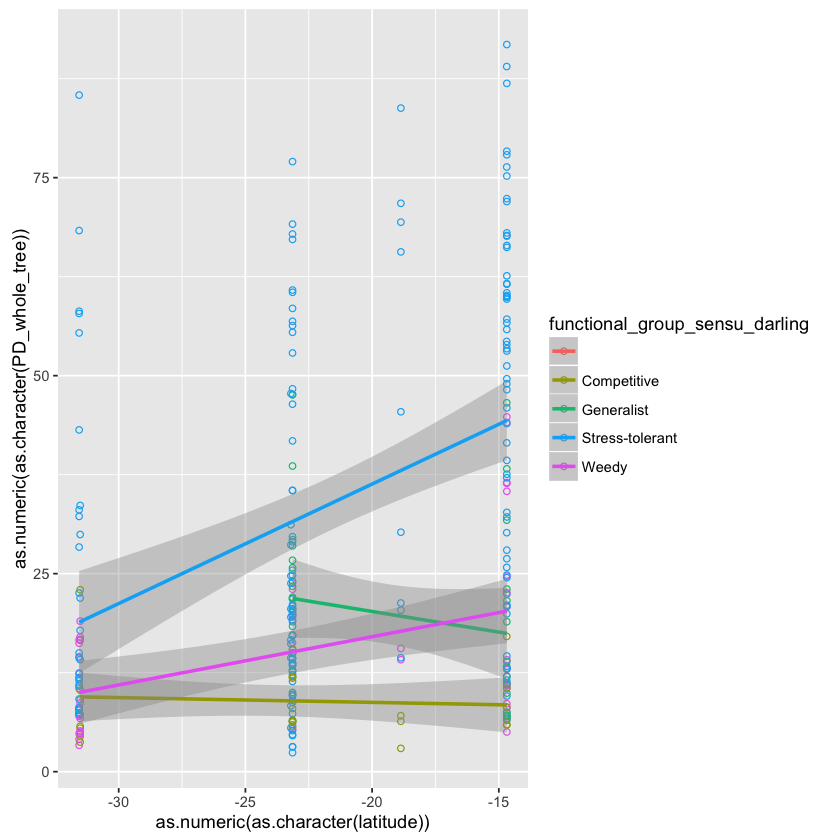

In [5]:
#PD_whole_tree~latitude, color=functional_group_sensu_darling
library(ggplot2)
ggplot(data_no_unknown, aes(x=as.numeric(as.character(latitude)), y=as.numeric(as.character(PD_whole_tree)), color=functional_group_sensu_darling)) +
    geom_point(shape=1) +
    geom_smooth(method=lm,   # Add linear regression lines
                se=TRUE)    # Add shaded confidence region


# Effect looks stong in Stress-tolerant and Weedy, but let's test statistically

In [30]:
subset(data_no_unknown, functional_group_sensu_darling == "Competitive")->data_no_unknown_competitive
subset(data_no_unknown, functional_group_sensu_darling == "Generalist")->data_no_unknown_generalist
subset(data_no_unknown, functional_group_sensu_darling == "Stress-tolerant")->data_no_unknown_stress_tolerant
subset(data_no_unknown, functional_group_sensu_darling == "Weedy")->data_no_unknown_weedy

print("Competitive")
cor.test(as.numeric(as.character(data_no_unknown_competitive$latitude)), as.numeric(as.character(data_no_unknown_competitive$PD_whole_tree)),
         alternative = "two.sided", method = "pearson", conf.level = 0.95)
print("Generalist")
cor.test(as.numeric(as.character(data_no_unknown_generalist$latitude)), as.numeric(as.character(data_no_unknown_generalist$PD_whole_tree)),
         alternative = "two.sided", method = "pearson", conf.level = 0.95)
print("Stress-tolerant")
cor.test(as.numeric(as.character(data_no_unknown_stress_tolerant$latitude)), as.numeric(as.character(data_no_unknown_stress_tolerant$PD_whole_tree)),
         alternative = "two.sided", method = "pearson", conf.level = 0.95)
print("Weedy")
cor.test(as.numeric(as.character(data_no_unknown_weedy$latitude)), as.numeric(as.character(data_no_unknown_weedy$PD_whole_tree)),
         alternative = "two.sided", method = "pearson", conf.level = 0.95)

[1] "Competitive"



	Pearson's product-moment correlation

data:  as.numeric(as.character(data_no_unknown_competitive$latitude)) and as.numeric(as.character(data_no_unknown_competitive$PD_whole_tree))
t = -0.39885, df = 24, p-value = 0.6935
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.4542216  0.3161421
sample estimates:
        cor 
-0.08114691 


[1] "Generalist"



	Pearson's product-moment correlation

data:  as.numeric(as.character(data_no_unknown_generalist$latitude)) and as.numeric(as.character(data_no_unknown_generalist$PD_whole_tree))
t = -1.1781, df = 33, p-value = 0.2472
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.5006312  0.1418409
sample estimates:
       cor 
-0.2009018 


[1] "Stress-tolerant"



	Pearson's product-moment correlation

data:  as.numeric(as.character(data_no_unknown_stress_tolerant$latitude)) and as.numeric(as.character(data_no_unknown_stress_tolerant$PD_whole_tree))
t = 5.4326, df = 165, p-value = 1.961e-07
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.2526048 0.5111521
sample estimates:
      cor 
0.3895256 


[1] "Weedy"



	Pearson's product-moment correlation

data:  as.numeric(as.character(data_no_unknown_weedy$latitude)) and as.numeric(as.character(data_no_unknown_weedy$PD_whole_tree))
t = 3.4245, df = 47, p-value = 0.001287
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.1894843 0.6467922
sample estimates:
      cor 
0.4468706 


# Significant correlation for stress-tolerant and weedy (strongest for stress-tolerant)

# How are compartments within stress-tolerant influenced by latitude?

ERROR: Error in file(con, "rb"): cannot open the connection


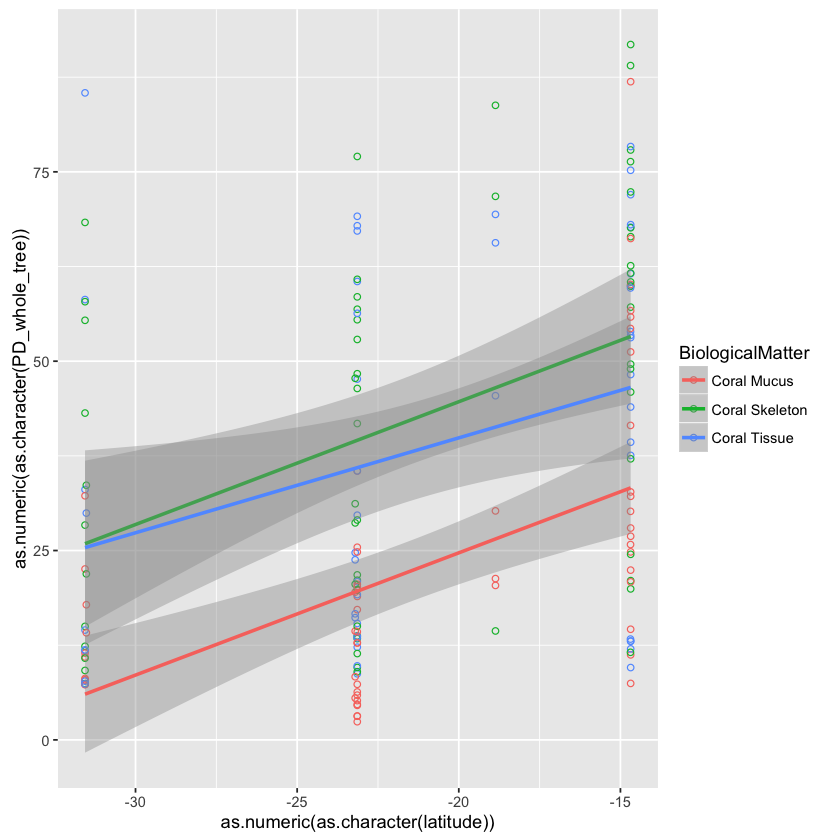

In [27]:
ggplot(data_no_unknown_stress_tolerant, aes(x=as.numeric(as.character(latitude)), y=as.numeric(as.character(PD_whole_tree)), color=BiologicalMatter)) +
    geom_point(shape=1) +
    geom_smooth(method=lm,   # Add linear regression lines
                se=TRUE)    # Add shaded confidence region

# Appears consistent across compartments
# Which taxa drive this?

ERROR: Error in file(con, "rb"): cannot open the connection


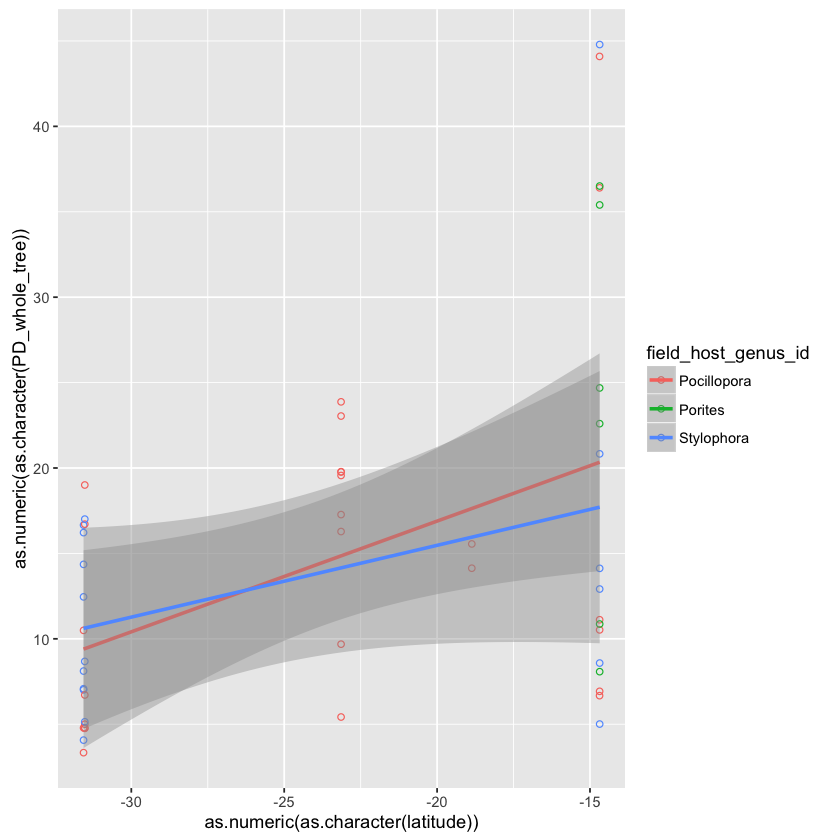

In [37]:
ggplot(data_no_unknown_weedy, aes(x=as.numeric(as.character(latitude)), y=as.numeric(as.character(PD_whole_tree)), color=field_host_genus_id)) +
    geom_point(shape=1) +
    geom_smooth(method=lm,   # Add linear regression lines
                se=TRUE)    # Add shaded confidence region

ERROR: Error in file(con, "rb"): cannot open the connection


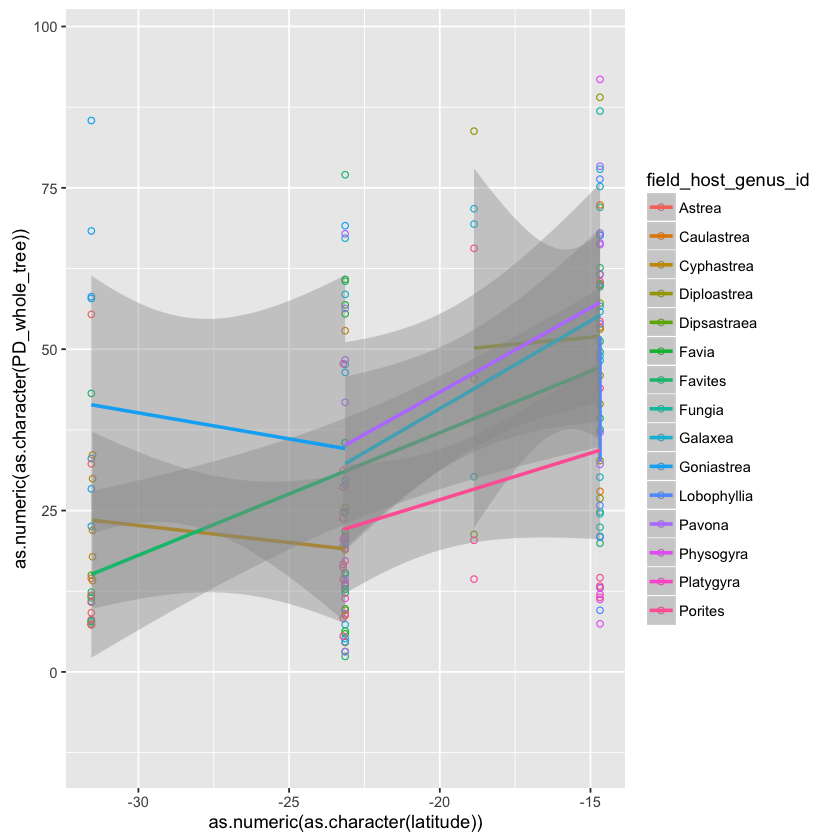

In [36]:
ggplot(data_no_unknown_stress_tolerant, aes(x=as.numeric(as.character(latitude)), y=as.numeric(as.character(PD_whole_tree)), color=field_host_genus_id)) +
    geom_point(shape=1) +
    geom_smooth(method=lm,   # Add linear regression lines
                se=TRUE)    # Add shaded confidence region

# Major drivers: 
# Stress-tolerant: Favites, Porites, Pavona & Lobophyllia
# Weedy: Porites & Stylophora

# Could this simply be driven by temperature

# How about Acropora?

ERROR: Error in file(con, "rb"): cannot open the connection


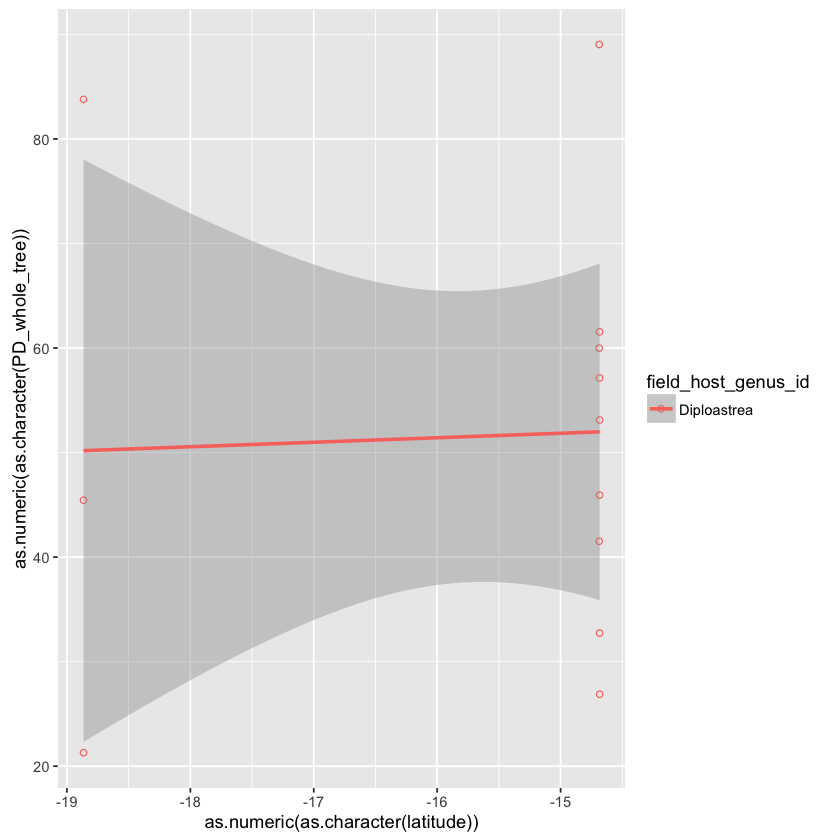

In [39]:
subset(data_no_unknown, field_host_genus_id == "Diploastrea")->data_no_unknown_acropora
ggplot(data_no_unknown_acropora, aes(x=as.numeric(as.character(latitude)), y=as.numeric(as.character(PD_whole_tree)), color=field_host_genus_id)) +
    geom_point(shape=1) +
    geom_smooth(method=lm,   # Add linear regression lines
                se=TRUE)    # Add shaded confidence region

Warning message:
: Removed 30 rows containing non-finite values (stat_smooth).Warning message:
: Removed 30 rows containing missing values (geom_point).

ERROR: Error in file(con, "rb"): cannot open the connection


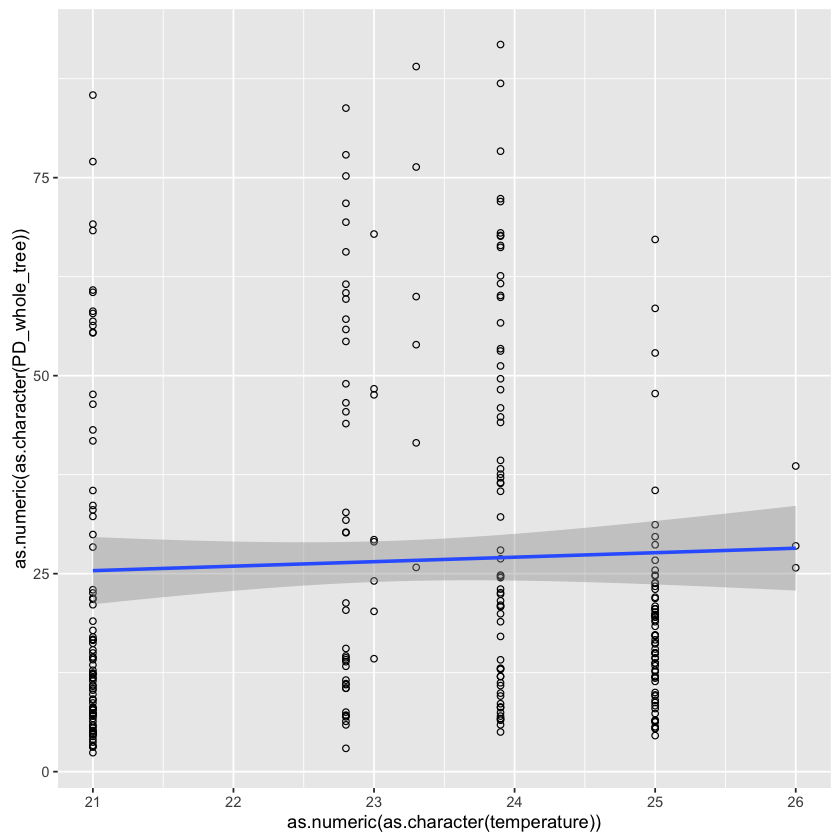

In [7]:
#PD_whole_tree~temperature
library(ggplot2)
ggplot(data_no_unknown, aes(x=as.numeric(as.character(temperature)), y=as.numeric(as.character(PD_whole_tree)))) +
    geom_point(shape=1) +
    geom_smooth(method=lm,   # Add linear regression lines
                se=TRUE)    # Add shaded confidence region

# Does not appear to be driven by temperature, but let's test this.

In [16]:
cor.test(as.numeric(as.character(data_no_unknown$temperature)), as.numeric(as.character(data_no_unknown$PD_whole_tree)),
         alternative = "two.sided", method = "pearson", conf.level = 0.95)


	Pearson's product-moment correlation

data:  as.numeric(as.character(data_no_unknown$temperature)) and as.numeric(as.character(data_no_unknown$PD_whole_tree))
t = 0.69029, df = 275, p-value = 0.4906
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.07664097  0.15866795
sample estimates:
       cor 
0.04159019 


# Stats support that correlation is not driven by temperature

# EXTRA:
# Below are additional exploratory figures re: colony size and alpha-diversity

ERROR: Error in file(con, "rb"): cannot open the connection


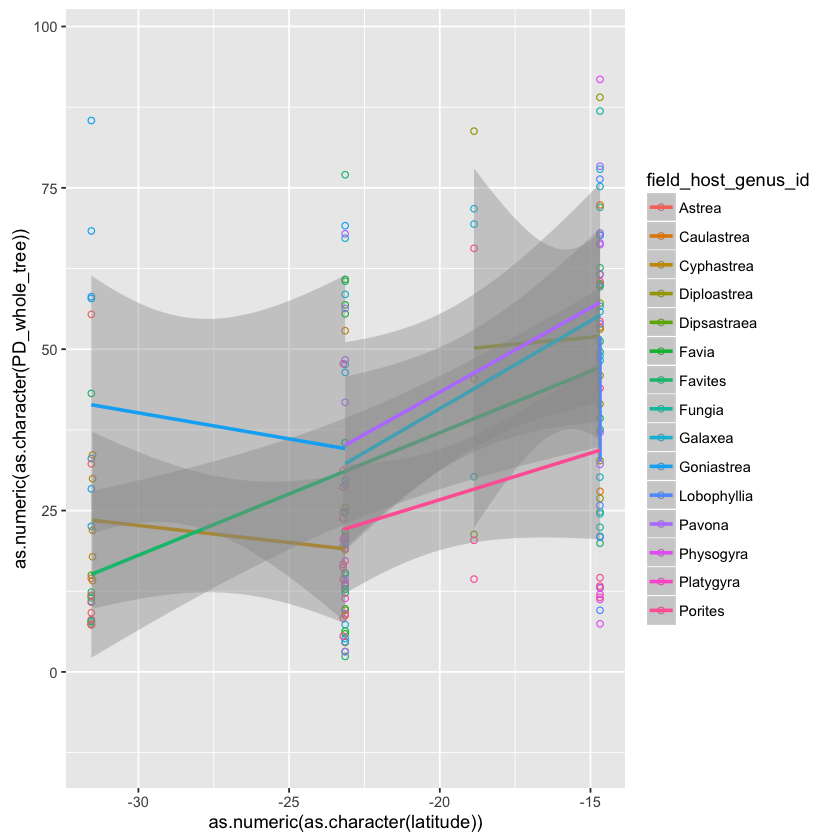

In [48]:
library(ggplot2)
ggplot(data_no_unknown_stress_tolerant, aes(x=as.numeric(as.character(latitude)), y=as.numeric(as.character(PD_whole_tree)), color=field_host_genus_id)) +
    geom_point(shape=1) +
    geom_smooth(method=lm,   # Add linear regression lines
                se=TRUE)    # Add shaded confidence region

Warning message:
: Removed 30 rows containing missing values (stat_smooth).Warning message:
: Removed 30 rows containing missing values (geom_point).

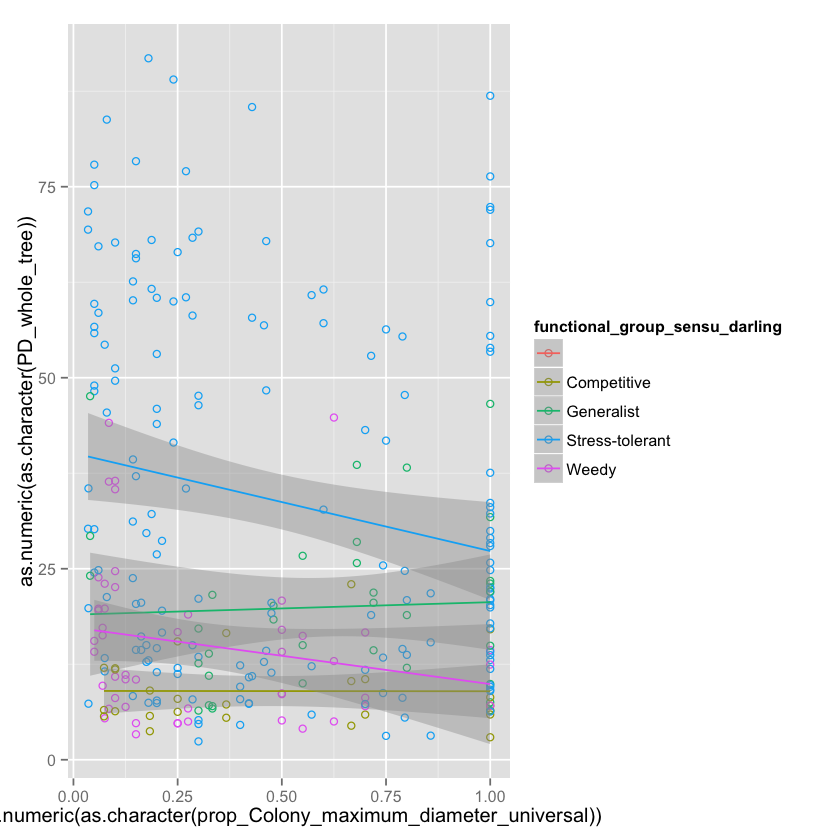

In [5]:
#PD_whole_tree~prop_Colony_maximum_diameter_universal
library(ggplot2)
ggplot(data_no_unknown, aes(x=as.numeric(as.character(prop_Colony_maximum_diameter_universal)), y=as.numeric(as.character(PD_whole_tree)), color=functional_group_sensu_darling)) +
    geom_point(shape=1) +
    geom_smooth(method=lm,   # Add linear regression lines
                se=TRUE)    # Add shaded confidence region

Warning message:
: Removed 30 rows containing missing values (stat_smooth).Warning message:
: Removed 30 rows containing missing values (geom_point).

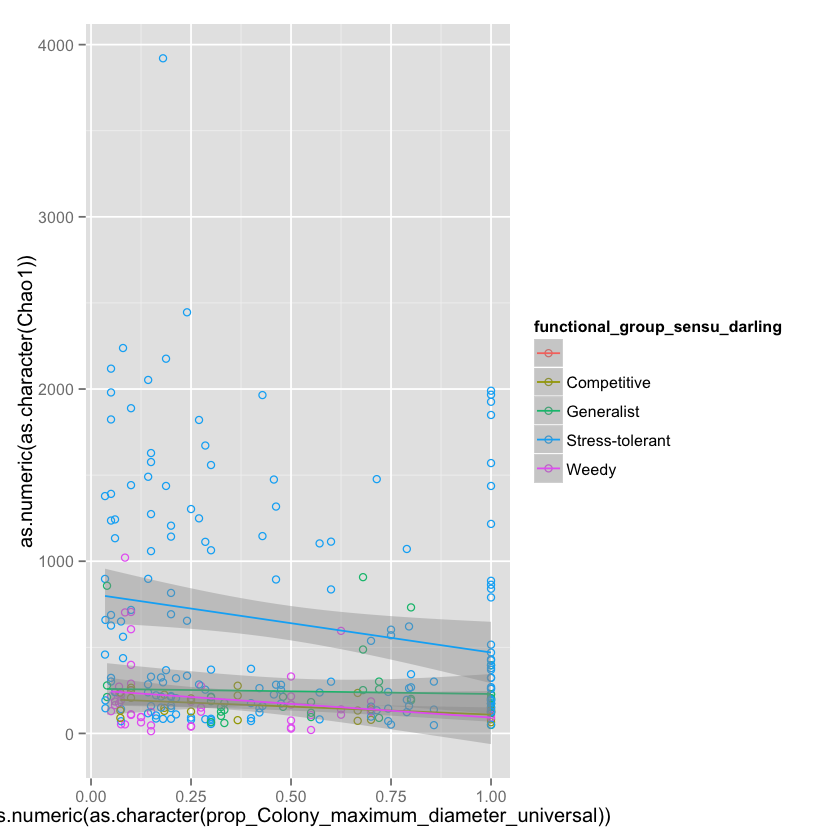

In [6]:
#Chao1~prop_Colony_maximum_diameter_universal
library(ggplot2)
ggplot(data_no_unknown, aes(x=as.numeric(as.character(prop_Colony_maximum_diameter_universal)), y=as.numeric(as.character(Chao1)), color=functional_group_sensu_darling)) +
    geom_point(shape=1) +
    geom_smooth(method=lm,   # Add linear regression lines
                se=TRUE)    # Add shaded confidence region

Warning message:
: Removed 30 rows containing missing values (stat_smooth).Warning message:
: Removed 30 rows containing missing values (geom_point).

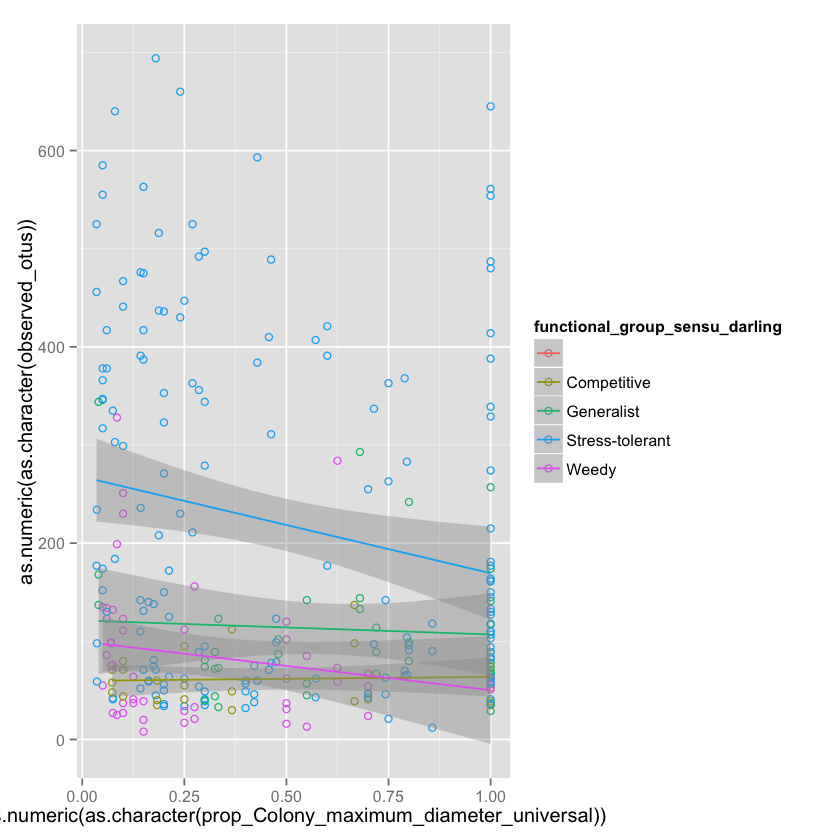

In [7]:
#observed_otus~prop_Colony_maximum_diameter_universal
library(ggplot2)
ggplot(data_no_unknown, aes(x=as.numeric(as.character(prop_Colony_maximum_diameter_universal)), y=as.numeric(as.character(observed_otus)), color=functional_group_sensu_darling)) +
    geom_point(shape=1) +
    geom_smooth(method=lm,   # Add linear regression lines
                se=TRUE)    # Add shaded confidence region

Warning message:
: Removed 30 rows containing missing values (stat_smooth).Warning message:
: Removed 30 rows containing missing values (geom_point).

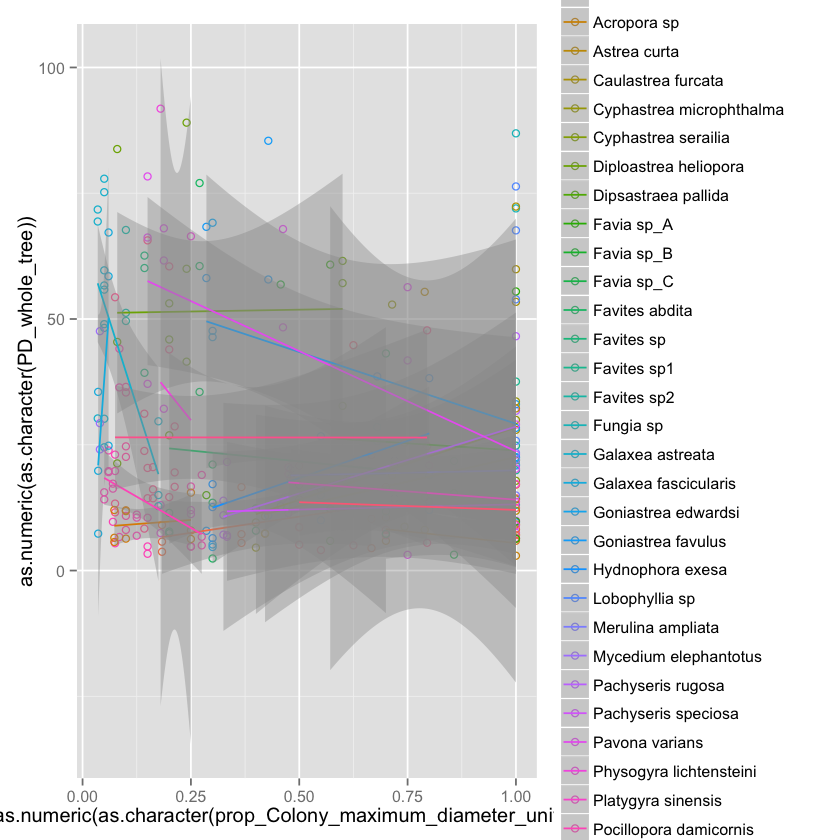

In [9]:
#PD_whole_tree~field_host_name, color=field_host_name
library(ggplot2)
ggplot(data_no_unknown, aes(x=as.numeric(as.character(prop_Colony_maximum_diameter_universal)), y=as.numeric(as.character(PD_whole_tree)), color=field_host_name)) +
    geom_point(shape=1) +
    geom_smooth(method=lm,   # Add linear regression lines
                se=TRUE)    # Add shaded confidence region

#Jesse idea: Color by functional group

Warning message:
: Removed 30 rows containing missing values (stat_smooth).Warning message:
: Removed 30 rows containing missing values (geom_point).

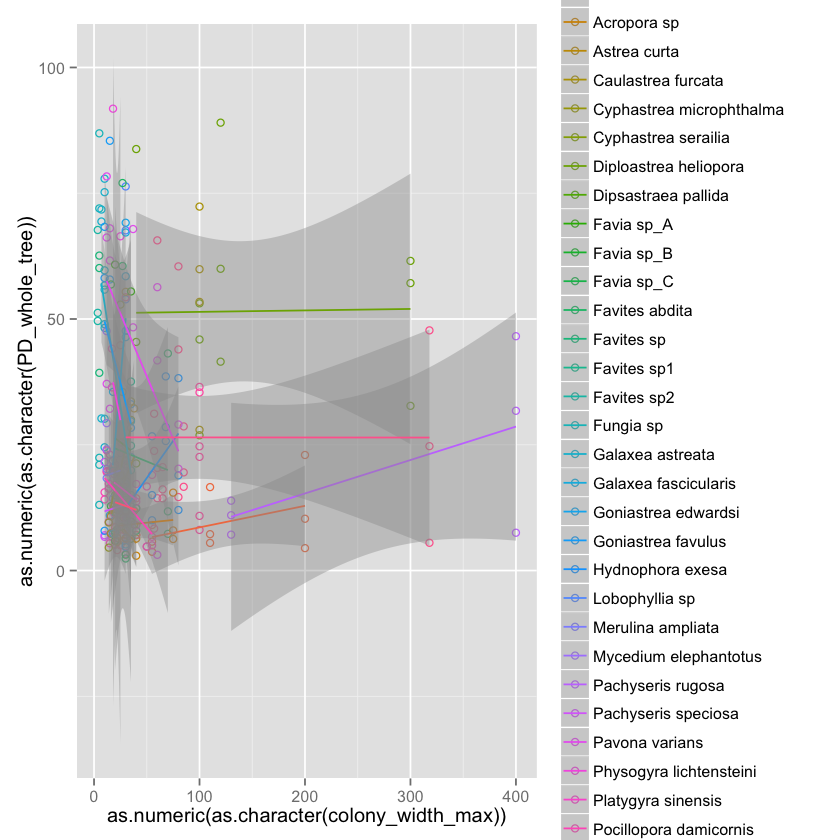

In [10]:
#PD_whole_tree~colony_width_max, color=field_host_name
library(ggplot2)
ggplot(data_no_unknown, aes(x=as.numeric(as.character(colony_width_max)), y=as.numeric(as.character(PD_whole_tree)), color=field_host_name)) +
    geom_point(shape=1) +
    geom_smooth(method=lm,   # Add linear regression lines
                se=TRUE)    # Add shaded confidence region

Warning message:
: Removed 30 rows containing missing values (stat_smooth).Warning message:
: Removed 30 rows containing missing values (geom_point).

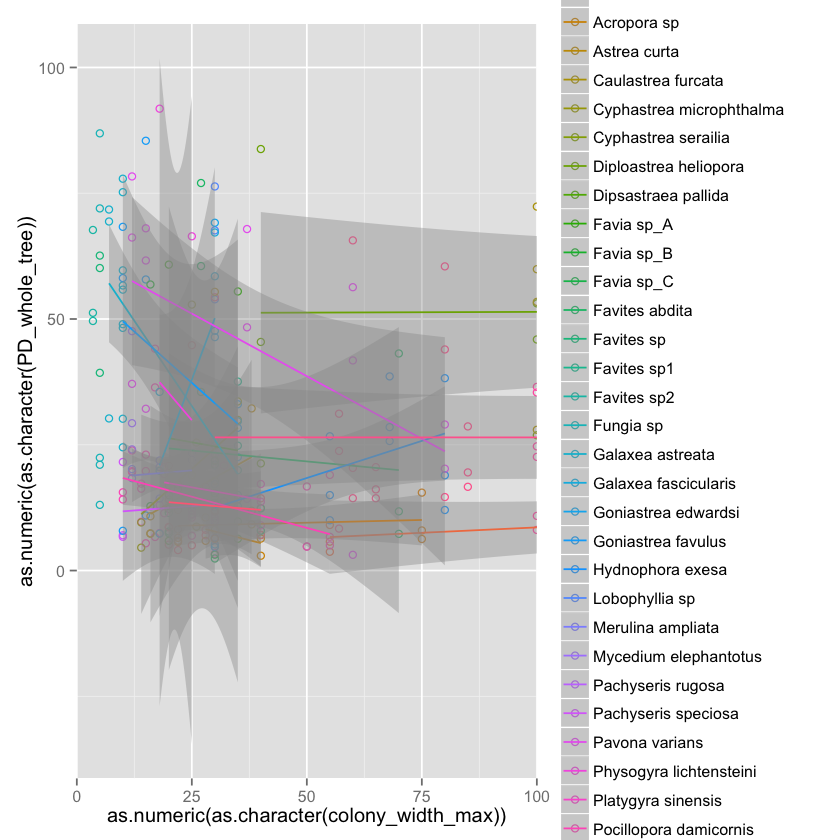

In [13]:
#PD_whole_tree~colony_width_max, color=field_host_name
library(ggplot2)
ggplot(data_no_unknown, aes(x=as.numeric(as.character(colony_width_max)), y=as.numeric(as.character(PD_whole_tree)), color=field_host_name)) +
    geom_point(shape=1) +
    geom_smooth(method=lm,   # Add linear regression lines
                se=TRUE) +    # Add shaded confidence region
    coord_cartesian(xlim = c(0, 100)) 

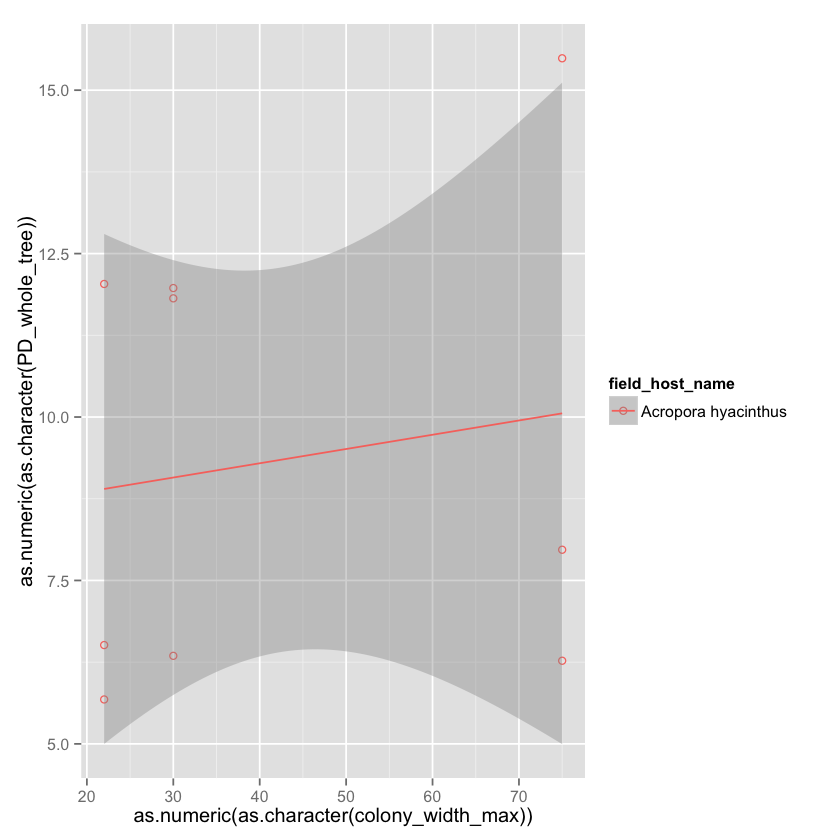

In [11]:
#PD_whole_tree~colony_width_max, color=field_host_name, A. hyacinthus ONLY
subset(data_no_unknown,field_host_name == "Acropora hyacinthus")->data_no_unknown_a_hyacinthus
ggplot(data_no_unknown_a_hyacinthus, aes(x=as.numeric(as.character(colony_width_max)), y=as.numeric(as.character(PD_whole_tree)), color=field_host_name)) +
    geom_point(shape=1) +
    geom_smooth(method=lm,   # Add linear regression lines
                se=TRUE)    # Add shaded confidence region

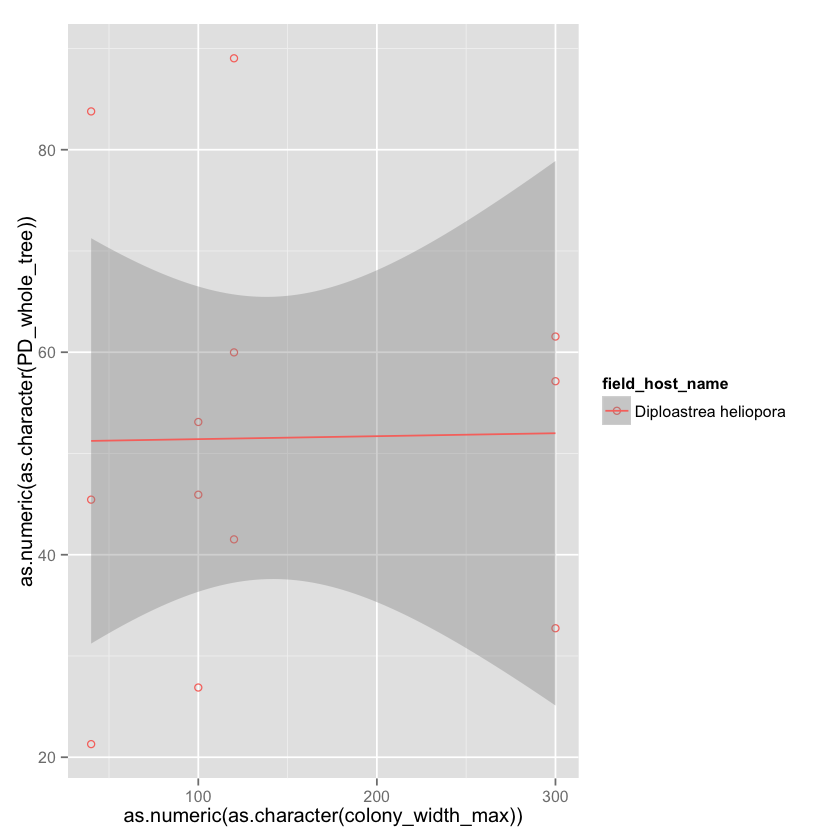

In [12]:
#PD_whole_tree~colony_width_max, color=field_host_name, Diploastrea heliopora ONLY
subset(data_no_unknown,field_host_name == "Diploastrea heliopora")->data_no_unknown_d_heliopora
ggplot(data_no_unknown_d_heliopora, aes(x=as.numeric(as.character(colony_width_max)), y=as.numeric(as.character(PD_whole_tree)), color=field_host_name)) +
    geom_point(shape=1) +
    geom_smooth(method=lm,   # Add linear regression lines
                se=TRUE)    # Add shaded confidence region

Warning message:
: Removed 30 rows containing missing values (stat_smooth).Warning message:
: Removed 30 rows containing missing values (geom_point).

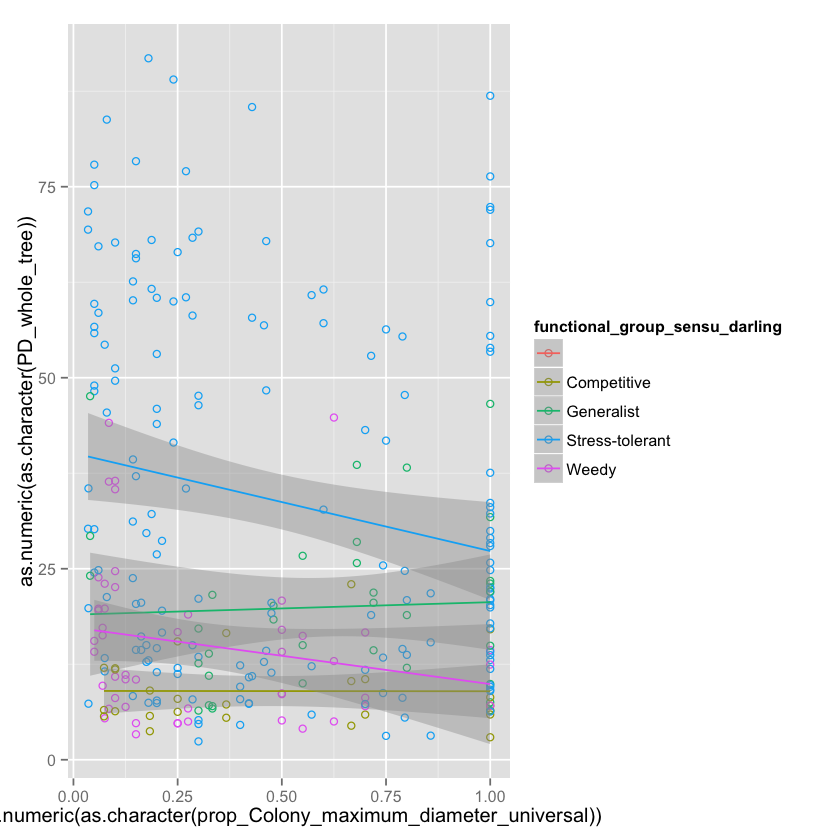

In [5]:
#PD_whole_tree~field_host_name, color=field_host_name
library(ggplot2)
ggplot(data_no_unknown, aes(x=as.numeric(as.character(prop_Colony_maximum_diameter_universal)), y=as.numeric(as.character(PD_whole_tree)), color=functional_group_sensu_darling)) +
    geom_point(shape=1) +
    geom_smooth(method=lm,   # Add linear regression lines
                se=TRUE)    # Add shaded confidence region

#Jesse idea: Color by functional group